# Assignment 2


In this assignment we will cover topics from the previous 3 lectures. We will cover the following topics:

1) Training a simple Linear Model

2) Implementing Modules with Backprop functionality

3) Implementing Convolution Module on Numpy.

4) Implement Dropout/Different Optimizer setups.

5) Implementing Pool and Training on CIFAR10?


It is crucial to get down to the nitty gritty of the code to implement all of these. No external packages (like caffe,pytorch etc), which directly give functions for these steps, are to be used. 

# Training a simple Linear Model

In this section, you will write the code to train a Linear Model. The goal is to classify and input $x_n$ of size $n$ into one of $m$ classes. For this goal, you need to create the following parts:

1) ** A weight Matrix $W_{n\times m}$ **, where the Weights are multipled to the input $X_n$ (Vector of size $n$), to find $m$ scores $S_m$ for the $m$ classes.

2) ** The Loss function **: We learnt two Kinds of Loss functions:
  *  The Hinge Loss: This loss measures, for each sample, how many times were the wrong classes scored above correct class score - $\Delta$ ? and by how much? This leads to the formulation:
  
$$
L_i = \sum_{j\neq y_i} \max(0, s_j - s_{y_i} + \Delta)
$$

where $y_i$ is the correct class, and $s_j$ is the score for the $j$-th class (the $j$-th element of $S_m$)
  
  * The softmax Loss: By interpreting the scores as unnormalized log probabilities for each class, this loss tries to measure dissatisfaction with the scores in terms of the log probability of the right class:

$$
L_i = -\log\left(\frac{e^{f_{y_i}}}{ \sum_j e^{f_j} }\right) \hspace{0.5in} \text{or equivalently} \hspace{0.5in} L_i = -f_{y_i} + \log\sum_j e^{f_j}
$$

where $f_{ y_i }$ is the $i$-th element of the output of $W^T_{n \times m} . X_m$

4) ** Regularization term **: In addition to the loss, you need a Regularization term to lead to a more distributed( in case of $L_2$) or sparse (in case of $L_1$) learning of the weights. For example, and having $L_2$ regularization would imply that your loss has the following additional term:

$$
R(W) = \sum_k\sum_l W_{k,l}^2,
$$

making the total loss:
$$
L =  \underbrace{ \frac{1}{N} \sum_i L_i }_\text{data loss} + \underbrace{ \lambda R(W) }_\text{regularization loss} \\\\
$$

3) ** An Optimization Procedure **: This refers to the process which tweaks the weight Matrix $W_{n\times m}$ to reduce the loss function $L$. In our case, this refers to Mini-batch Gradient Descent algorithm. We adjust the weights $W_{n\times m}$, based on the gradient of the loss $L$ w.r.t. $W_{n\times m}$. This leads to:

$$
W_{t+1} = W_{t} + \alpha \frac{\partial L}{\partial W},
$$
where $\alpha$ is the learning rate. Additionally, as we will be doing "mini-batch" gradient Descent, instead of finding loss over the whole dataset, we find it only for a small sample of the traning data for each learning step we take. Basically,
$$
W_{t+1} = W_{t} + \alpha \frac{\partial \sum^{b}{L_{x_i}}}{\partial W},
$$
where, $b$ is the batch size.

# Question 1

Train a **Single-Layer Classifier** for the MNIST dataset. Guidelines:
* Use a loss of your choice.
* Keep a validation split of the trainingset for finding the right value of $\lambda$ for the regularization, and to check for over fitting.
* Finally,evaluate the classification performance on the testset.


In [2]:
## Load The Mnist data:
# Download data from http://yann.lecun.com/exdb/mnist/
# load the data.
import numpy as np
from matplotlib import pyplot as plt
import struct
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

X = read_idx('train-images.idx3-ubyte')
Y = read_idx('train-labels.idx1-ubyte')

X_test = read_idx('t10k-images.idx3-ubyte')
Y_test = read_idx('t10k-labels.idx1-ubyte')

# Now a function, which returns a generator random mini-batch of the input data
def get_minibatch_function(training_x, training_y, batchSize):
    NUM = training_x.shape[0]
    idx = [x for x in range(NUM)] 
    shuffle(idx)
    training_x = training_x[idx]
    training_y = training_y[idx]
    def get_minibatch(training_x=training_x, training_y=training_y,batchSize=batchSize):
        for start_idx in range(0,len(idx),batchSize) :
            mini_x = training_x[start_idx:start_idx+batchSize]
            mini_y = training_y[start_idx:start_idx+batchSize]
            yield mini_x,mini_y           
    return get_minibatch

In [3]:
# Define the class Single Layer Classifier
class single_layer_classifier():
    
    def __init__(self, input_size, output_size):
        
        W = np.random.rand(input_size, output_size) # (f*k)
        self.W = W
        # Give the instance a weight matrix, initialized randomly.
        
    # Define the forward function
    def forward(self, input_x):   
        
        # get the scores
        self.input_x = input_x
        self.num = input_x.shape[0]
        scores = np.dot(input_x, self.W) # (n*f)
        return scores
    
    # Similarly a backward function
    # we define 2 backward functions (as Loss = L1 + L2, grad(Loss) = grad(L1) + grad(L2))
    
    def backward_from_loss(self, grad_from_loss):
        
        # this function returns a matrix of the same size as the weights, 
        # where each element is the partial derivative of the loss w.r.t. the respective element of weight.

        grad_matrix = np.dot(self.input_x.T,grad_from_loss)/self.num
        return grad_matrix
        
    def backward_from_l2(self):
        
        # this function returns a matrix of the same size as the weights, 
        # where each element is the partial derivative of the regularization_term
        # w.r.t. the respective element of weight.
        
        grad_matrix = self.W*2
        
        return grad_matrix
    
    # BONUS
    def grad_checker(input_x, grad_matrix):
        
        # Guess what to do?
        
        ## WRITE CODE HERE
        
        if diff<threshold:
            return true
        else:
            return false
        

In [4]:
# Now we need the loss functions,one which calculates the loss, 
# and one which give the backward gradient
# Make any one of the suggested losses

def loss_forward(input_y, scores):
    #print('Indside Forward', )
    scores -= np.max(scores,axis=1,keepdims=True)
    exp_scores = np.exp(scores)
    prob = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)+1e-6
    corect_logprob = -np.log(prob[range(input_y.shape[0]),input_y])
    data_loss = np.sum(corect_logprob)/slc.num
    #reg_loss = slc.reg*np.sum(slc.W*slc.W)
    
    loss = data_loss #+ reg_loss
    return loss,prob
 
def loss_backward(input_y, prob):
    # This part deals with the gradient from the loss to the weight matrix.
    # for example, in case of softmax loss(-log(qc)), this part gives grad(loss) w.r.t. qc
    dqc = prob
    dqc[range(input_y.shape[0]),input_y] -= 1
    grad_from_loss = dqc
    
    return grad_from_loss
        

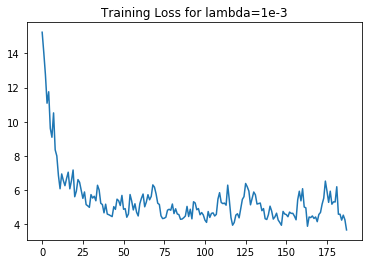

In [5]:
# Finally the trainer:

#reshape
#X = np.reshape(X, (X.shape[0], -1))
#Y = np.reshape(Y, (Y.shape[0], -1))

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

#normalize
#mean_image = np.mean(X_train, axis = 0)
#print((mean_image))
#X_train =  np.subtract(X_train, mean_image)
#X_val =  np.subtract(X_val, mean_image)
#X_test =  np.subtract(X_test, mean_image)


#X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
#X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
#X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

# let it be for t iterations:
#print ('X_train,Y_train',X_train.shape,Y_train.shape)
#print ('X_train',X_train[500:550,500:550])

# make an instance of single_layer_classifier,

step_size = 5e-3 #5e-4
reg = 1e-3        #1e-2
batchSize = 256
slc = single_layer_classifier(784,10)

# get the mini-batch yielder.
get_minibatch = get_minibatch_function(X_train,Y_train, batchSize)

error_curve = []
for iter,(input_x, input_y) in enumerate(get_minibatch()):
       
    input_x = input_x.reshape(-1,784)
    scores = slc.forward(input_x)
    loss_f,prob= loss_forward(input_y, scores)
    loss_b = loss_backward(input_y, prob)
    L1 = slc.backward_from_loss(loss_b)
    L2 = reg*slc.backward_from_l2()
    dW = L1+L2
    slc.W = slc.W - step_size*(dW)
    error_curve.append(loss_f + reg*np.sum(slc.W**2))
       
plt.plot(error_curve)
plt.title("Training Loss for lambda=1e-3")
plt.show()

In [6]:
# Find the performance on the validation set.
X_val_check = X_val.reshape(-1,784)
X_train_check = X_train.reshape(-1,784)
scores_train = np.dot(X_train_check, slc.W)
scores_val = np.dot(X_val_check, slc.W)
predicted_train = np.argmax(scores_train, axis=1)
predicted_val = np.argmax(scores_val, axis=1)
print ('Training accuracy: %.2f' % (np.mean(predicted_train == Y_train)))
print ('Validation accuracy: %.2f' % (np.mean(predicted_val == Y_val)))
# find the top-1 accuracy on the validation set.

Training accuracy: 0.87
Validation accuracy: 0.87


In [7]:
# now make a trainer function based on the above code, which trains for 't' iteration,
# and returns the performance on the validation

def trainer(iteration, kwargs):

    slc = single_layer_classifier(784,10)
    step_size = kwargs['step_size']
    reg = kwargs['lambda']
    batchSize=kwargs['batchSize']
    X_train = kwargs['train_X']
    Y_train = kwargs['train_Y']
    X_val = kwargs['val_X']
    Y_val = kwargs['val_Y']
    get_minibatch = get_minibatch_function(X_train,Y_train,batchSize)
    error_curve = []
    for t in range(iteration) :
        for iter,(input_x, input_y) in enumerate(get_minibatch()):
            input_x = input_x.reshape(-1,784)
            scores = slc.forward(input_x)
            loss_f,prob= loss_forward(input_y, scores)
            loss_b = loss_backward(input_y, prob)
            L1 = slc.backward_from_loss(loss_b)
            L2 = reg*slc.backward_from_l2()
            dW = L1+L2
            slc.W = slc.W - step_size*(dW)
            error_curve.append(loss_f + reg*np.sum(slc.W**2))
            
    plt.plot(error_curve)
    plt.title("Training Loss for Lambda : {}".format(reg))
    plt.show()

    top_1=0
    X_val_check = X_val.reshape(-1,784)
    scores_val = np.dot(X_val_check, slc.W)
    predicted_val = np.argmax(scores_val, axis=1)
    top_1 = np.mean(predicted_val == Y_val)
    return slc,top_1


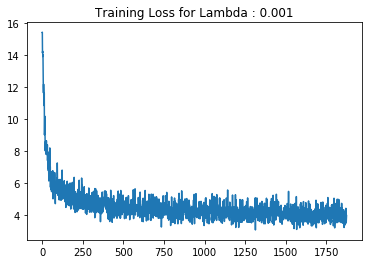

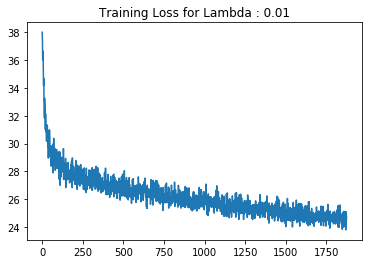

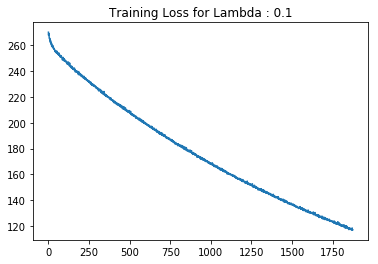

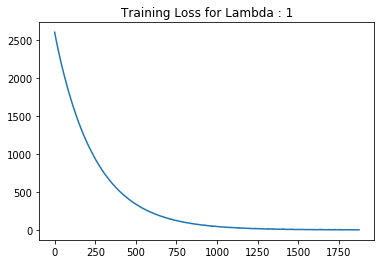

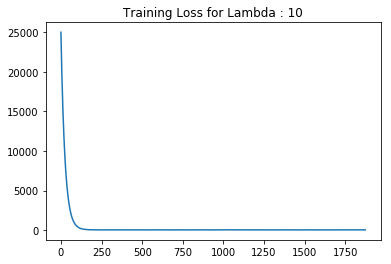

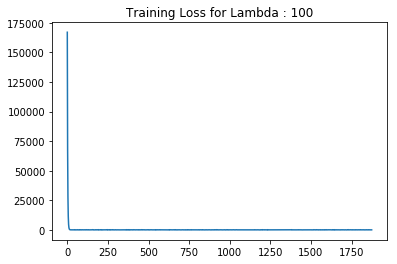

Optimal Lambda is: 0.1 as per validation accuracy: 0.87975


In [8]:
# Find the optimal lambda and iterations t
step_size = 1e-3
batchSize = 128
reg = [.001,.01,.1,1,10,100]
t = 5
#iterations = t*size of training_data/batch_size
kwargs = {'step_size':step_size,
          'batchSize':batchSize,
          'train_X':X_train,
          'train_Y':Y_train,
          'val_X':X_val,
          'val_Y':Y_val,
          'lambda':0}

top_1 =[]
for r in reg:
    kwargs['lambda']=r
    _,accuracy = trainer(t,kwargs)
    top_1.append(accuracy)
    
best_regularizer = reg[np.argmax(top_1)]
print ("Optimal Lambda is: {} as per validation accuracy: {}".format(best_regularizer,np.max(top_1)))
    

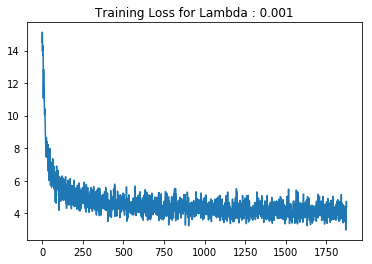

test accuracy is: 0.8694
Accuracy of Worst Class:  0.6694045174537988
Accuracy of Best Class:  0.9762114537444934


In [9]:
# Train on whole dataset with these values,(from scratch)
reg = 0.001
t=5
step_size = 1e-3
batchSize = 128
kwargs = {'step_size':step_size,
          'batchSize':batchSize,
          'train_X':X_train,
          'train_Y':Y_train,
          'val_X':X_test,
          'val_Y':Y_test,
          'lambda':reg}

# report final performance on mnist test set.
_,accuracy = trainer(t,kwargs) 
print ("test accuracy is: {}".format(accuracy))
# Find the best performing class and the worst performing class.

X_test_check = X_test.reshape(-1,784)
scores_test = np.dot(X_test_check, slc.W)

labels_true = [0]*10
labels_total = [0]*10
for i,s in enumerate(scores_test):
    pred_label = np.argmax(s)
    labels_total[Y_test[i]]+=1
    if pred_label==Y_test[i]:
        labels_true[pred_label]+=1
    
best_idx = np.argmax(labels_true)
worst_idx = np.argmin(labels_true)

print('Accuracy of Worst Class: ',labels_true[worst_idx]/labels_total[worst_idx])
print('Accuracy of Best Class: ',labels_true[best_idx]/labels_total[best_idx])

# Implementing Backprop

Now that you have had some experience with single layer networks, its time to go to more complex architectures. But first we need to completely understand and implement backpropagation.

## Backpropagation:

Simple put, a way of computing gradients of expressions through recursive application of chain rule. If,
$$
L = f (g (h (\textbf{x})))
$$
then,
$$
\frac{\partial L}{\partial \textbf{x}} = \frac{\partial f}{\partial g} \times \frac{\partial g}{\partial h} \times\frac{\partial h}{\partial \textbf{x}} 
$$

** Look into the class Lecture for more detail **



# Question 2 : Scalar Backpropagation

Evaluate the gradient of the following functions w.r.t. the input.

1) $$ f(x,y,z) =  log(\sigma(\frac{cos(\pi \times \sigma(x))+sin(\pi \times \sigma(y/2))}{z^2}))$$
where $\sigma$ is the sigmoid function. Find gradient for the following values:
  * $(x,y,z)$ =  (1,2,3)
  * $(x,y,z)$ =  (3,2,1)
  * $(x,y,z)$ =  (12,23,31)
  * $(x,y,z)$ =  (32,21,13)

2) $$ f(x,y,z) = -tan(z) + exp(4x^2 + 3x + 10) - x^{y^z} $$
where $\exp$ is the exponential function. Find gradient for the following values:
  * $(x,y,z)$ =  (-0.1 ,2 ,-3)
  * $(x,y,z)$ =  (-3, 0.2,0.5)
  * $(x,y,z)$ =  (1.2, -2.3, 3.1)
  * $(x,y,z)$ =  (3.2, 2.1, -1.3)
      

In [10]:
# To solve this problem, construct the computational graph (will help understanding the problem)(not part of assignment)
# Write each component of the graph as a class, with forward and backward functions.
# for eg:
     
class sigmoid():
    def __init__(self):
        pass
    def forward(self, x):
        y= 1/(1+np.exp(-x))
        self.y = y
        return y      
    def backward(self):
        return self.y*(1-self.y)

class mul_constant():
    def forward(self,a ,x):
        y = a*x
        self.constant = a
        return y    
    def backward(self):
        return self.constant

class sin():
    def forward(self, x):
        self.x=x
        return np.sin(x)
        
    def backward(self):
        return np.cos(self.x)
    
class cos():
    def forward(self, x):
        self.x=x
        return np.cos(x)
        
    def backward(self):
        return -np.sin(self.x)
    
class tan():
    def forward(self, x):
        self.x=x
        return np.tan(x)
        
    def backward(self):
        return 1/(np.cos(self.x)**2)
    
class power():
    def forward(self, p, x):
        self.x=x
        self.p=p
        return x**p
        
    def backward(self):
        return self.p*(self.x**(self.p-1))
    
class log():
    def forward(self, x):
        self.x=x
        y = np.log(x)
        return y
        
    def backward(self):
        return 1/self.x
    
class add():
    def forward(self, x1, x2):
        return (x1+x2)
    
    def backward(self):
        return 1
    
class mul():
    def forward(self, x1, x2):
        self.x1=x1
        self.x2=x2
        return x1*x2
        
    def backward(self,idx):
        if idx==0:
            return self.x2
        else:
            return self.x1
        
class exp():
    def forward(self, x):
        y = np.exp(x)
        self.y=y
        return y
    
    def backward(self):
        return self.y

class a_pow_b():
    def forward(self, x1, x2):
        self.x1 = x1
        self.x2 = x2
        return x1**x2
    
    def backward(self, idx):
        dx1 = self.x2*(self.x1**(self.x2-1))
        dx2 = (self.x1**self.x2)*np.log(self.x1)
        if idx==0:
            return dx1
        else:
            return dx2
# CAUTION: Carefully treat the input and output dimension variation. At worst, handle them with if statements.
# Similarly create the classes for various sub-parts/elements of the graph.

In [11]:
# Now write func_1_creator, 
# which constructs the graph(all operators), forward and backward functions.

#s = sigmoid()
#ans = s.forward(1)
#dans = s.backward()
#print (ans,dans)

class func1():
    def __init__(self):
        # construct the graph here, 
        # assign the instances of function modules to self.var
        self.mul_half = mul_constant()
        self.sigmoid_x = sigmoid()
        self.sigmoid_y = sigmoid()
        self.mul_pi_x = mul_constant()
        self.mul_pi_y = mul_constant()
        self.cos_x = cos()
        self.sin_y = sin()
        self.add_xy = add()
        self.pow_z = power()
        self.mul_sincos_z = mul()
        self.sigmoid_z = sigmoid()
        self.log_z = log()
        
    def forward(self,x,y,z):
        # Using the graph element's forward functions, get the output.
        t1 = self.sigmoid_x.forward(x)
        t2 = self.mul_half.forward(0.5,y)
        t3 = self.sigmoid_y.forward(t2)
        t4 = self.mul_pi_x.forward(np.pi,t1)
        t5 = self.mul_pi_y.forward(np.pi,t3)
        t6 = self.cos_x.forward(t4)
        t7 = self.sin_y.forward(t5)
        t8 = self.add_xy.forward(t6,t7)
        t9 = self.pow_z.forward(-2,z)
        t10 = self.mul_sincos_z.forward(t8,t9)
        t11 = self.sigmoid_z.forward(t10)
        t12 = self.log_z.forward(t11)
        output=t12
        return output
    
    
    def backward(self):
        # Use the saved outputs of each module, and backward() function calls
        grad_x = self.log_z.backward()*self.sigmoid_z.backward()*self.mul_sincos_z.backward(0)*self.add_xy.backward()
        grad_x*=self.cos_x.backward()*self.mul_pi_x.backward()*self.sigmoid_x.backward()
        
        grad_y = self.log_z.backward()*self.sigmoid_z.backward()*self.mul_sincos_z.backward(0)*self.add_xy.backward()
        grad_y*=self.sin_y.backward()*self.mul_pi_y.backward()*self.sigmoid_y.backward()*self.mul_half.backward()
        
        grad_z = self.log_z.backward()*self.sigmoid_z.backward()*self.mul_sincos_z.backward(1)*self.pow_z.backward()
        
        return [grad_x,grad_y,grad_z]
    
f1 = func1()

x = f1.forward(1,2,3)
grads = f1.backward()
print('grads[1,2,3]:',grads)

f1.forward(3,2,1)
grads = f1.backward()
print('\ngrads[3,2,1]: ',grads)

f1.forward(12,23,31)
grads = f1.backward()
print('\ngrads[12,23,31]: ',grads)

f1.forward(32,21,13)
grads = f1.backward()
print('\ngrads[32,21,13]: ',grads)


grads[1,2,3]: [-0.025544725443367562, -0.011336065344893414, -0.003100440188579966]

grads[3,2,1]:  [-0.01179725123607157, -0.11479644823429058, 0.2699174041853647]

grads[12,23,31]:  [-1.9395308189331022e-13, -8.283178997197168e-09, 3.358358006475774e-05]

grads[32,21,13]:  [-4.7301241529761304e-30, -1.2834237773424494e-07, 0.00045647316954041154]


In [12]:
#Similarly,

class func2():
    def __init__(self):
        # construct the graph here, 
        # assign the instances of function modules to self.var
        self.pow_x = power()
        self.mul_1 = mul_constant()
        self.mul_2 = mul_constant()
        self.add_1 = add()
        self.add_2 = add()
        self.exp_x = exp()
        self.tan_z = tan()
        self.neg_tanz = mul_constant()
        self.add_3 = add()
        self.y_pow_z = a_pow_b()
        self.x_pow_y = a_pow_b()
        self.neg_xyz = mul_constant()
        self.add_4 =add()
    def forward(self,x,y,z):
        # Using the graph element's forward functions, get the output. 
        t1 = self.pow_x.forward(2,x)
        t2 = self.mul_1.forward(4,t1)
        t3 = self.mul_2.forward(3,x)
        t4 = self.add_1.forward(t2,t3)
        t5 = self.add_2.forward(10,t4)
        t6 = self.exp_x.forward(t5)
        t7 = self.tan_z.forward(z)
        ta = self.neg_tanz.forward(-1,t7)
        t8 = self.add_3.forward(t6,ta)
        t9 = self.y_pow_z.forward(y,z)
        t10 = self.x_pow_y.forward(x,t9)
        tb = self.neg_xyz.forward(-1,t10)
        t11 = self.add_4.forward(t8,tb)
        output = t11
        return output
    
    def backward(self):
        # Use the saved outputs of each module, and backward() function calls
        grad_x_common = self.add_4.backward()*self.add_3.backward()*self.exp_x.backward()*self.add_2.backward()*self.add_1.backward()
        grad_x_1 = grad_x_common*self.mul_2.backward()
        grad_x_2 = grad_x_common*self.mul_1.backward()*self.pow_x.backward()
        grad_x_3 = self.add_4.backward()*self.neg_xyz.backward()*self.x_pow_y.backward(0)
        grad_x = grad_x_1+grad_x_2+grad_x_3
        
        grad_y = self.add_4.backward()*self.neg_xyz.backward()*self.x_pow_y.backward(1)*self.y_pow_z.backward(0)
       
        grad_z_1 = self.add_4.backward()*self.neg_xyz.backward()*self.x_pow_y.backward(1)*self.y_pow_z.backward(1)
        grad_z_2 = self.add_4.backward()*self.add_3.backward()*self.neg_tanz.backward()*self.tan_z.backward()
        grad_z = grad_z_1+grad_z_2
        
        return [grad_x,grad_y,grad_z]
    
    
f2 = func2()
f2.forward(0.1,2,3)
grads = f2.backward()
print('grads[0.1 ,2 ,3]:',grads) 

f2.forward(3,.2,.5)
grads = f2.backward()
print('\ngrads[3 ,.2 ,.5]:',grads)  

f2.forward(1.2,2.3,3.1)
grads = f2.backward()
print('\ngrads[1.2 ,2.3 ,3.1]:',grads)  

f2.forward(3.2,2.1,1.3)
grads = f2.backward()
print('\ngrads[3.2 ,2.1 ,1.3]:',grads)  
    
    
    

grads[0.1 ,2 ,3]: [117594.91417797141, 2.763102111592856e-07, -1.0203193892599978]

grads[3 ,.2 ,.5]: [2.0775920215883447e+25, -2.007587906556902, -0.006011174666770591]

grads[1.2 ,2.3 ,3.1]: [3223381419.7415576, -36.21639166982964, -23.382188381313615]

grads[3.2 ,2.1 ,1.3]: [5.717943466907864e+27, -39.95014749046378, -61.855959996661184]


## Question 3 : Modular Vector Backpropagation

* Construct a Linear Layer module, implementing the forward and backward functions for arbitrary sizes.
* Construct a ReLU module, implementing the forward and backward functions for arbitrary sizes.
* Create a 2 layer MLP using the constructed modules.

* Modifying the functions built in Question 1 , train this two layer MLP for the same data set (MNIST).

In [13]:
# Class for Linear Layer (Refer code of pytorch/tensorflow package if required.) 
class Linear_Layer():
    def __init__(self,input_size,output_size,step_size,reg):
        W = np.random.rand(input_size,output_size)
        self.W = W
        self.step_size = step_size
        self.reg = reg
        
    def forward(self,input_x):
        
        self.input_x = input_x
        self.num = input_x.shape[0]
        scores = np.dot(input_x, self.W)
        return scores
    
    
    def backward(self, grad_from_loss):    
        grad = grad_from_loss.dot(self.W.T)
        dW = np.dot(self.input_x.T,grad_from_loss)/self.num
        self.W = self.W - step_size*(dW+self.reg*self.W)
        return grad

In [14]:
# Class for ReLU
class ReLU:
    def forward(self, input_x):
        self.input_x = input_x
        return np.maximum(input_x, 0)

    def backward(self, above):
        delta = np.greater(self.input_x, 0).astype(float)
        return delta * above

In [15]:
# Your 2 layer MLP 
ll_1 = Linear_Layer(784,128,1e-3,1)
relu_1 = ReLU()
ll_2 = Linear_Layer(128,10,1e-4,1)



Epoch 1 Validation accuracy: 0.10
Epoch 2 Validation accuracy: 0.10
Epoch 3 Validation accuracy: 0.10
Epoch 4 Validation accuracy: 0.15
Epoch 5 Validation accuracy: 0.29
Epoch 6 Validation accuracy: 0.48
Epoch 7 Validation accuracy: 0.85
Epoch 8 Validation accuracy: 0.90
Epoch 9 Validation accuracy: 0.92
Epoch 10 Validation accuracy: 0.93
Epoch 11 Validation accuracy: 0.93
Epoch 12 Validation accuracy: 0.94
Epoch 13 Validation accuracy: 0.94
Epoch 14 Validation accuracy: 0.94
Epoch 15 Validation accuracy: 0.95
Epoch 16 Validation accuracy: 0.95
Epoch 17 Validation accuracy: 0.95
Epoch 18 Validation accuracy: 0.95
Epoch 19 Validation accuracy: 0.95
Epoch 20 Validation accuracy: 0.95


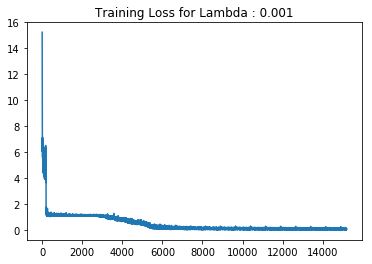

In [16]:
X1 = read_idx('train-images.idx3-ubyte')
Y1 = read_idx('train-labels.idx1-ubyte')

X_test1 = read_idx('t10k-images.idx3-ubyte')
Y_test1 = read_idx('t10k-labels.idx1-ubyte')

X_train1, X_val1, Y_train1, Y_val1 = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Train the MLP
batchSize = 64
get_minibatch = get_minibatch_function(X_train1,Y_train1, batchSize)
error_curve
for x in range(20):
    for iter,(input_x, input_y) in enumerate(get_minibatch()):
        input_x = input_x.reshape(-1,784)
        scores_1 = ll_1.forward(input_x)
        scores_r = relu_1.forward(scores_1)
        scores_2 = ll_2.forward(scores_r)
       
        loss_f,prob= loss_forward(input_y, scores_2)
        loss_b = loss_backward(input_y, prob)
        grad = ll_1.backward(relu_1.backward(ll_2.backward(loss_b)))
        error_curve.append(loss_f )
    X_val_check = X_val1.reshape(-1,784)
    scores_1 = ll_1.forward(X_val_check)
    scores_r = relu_1.forward(scores_1)
    scores_val = ll_2.forward(scores_r)
    predicted_val = np.argmax(scores_val, axis=1)
    print ('Epoch', x+1,'Validation accuracy: %.2f' % (np.mean(predicted_val == Y_val1)))  

plt.plot(error_curve)
plt.title("Training Loss for Lambda : {}".format(reg))
plt.show()



In [17]:
# Validation Performance
X_test_check = X_test.reshape(-1,784)
scores_1 = ll_1.forward(X_test_check)
scores_r = relu_1.forward(scores_1)
scores_test = ll_2.forward(scores_r)
predicted_test = np.argmax(scores_test, axis=1)
print ('Test accuracy: %.2f' % (np.mean(predicted_test == Y_test))) 

Test accuracy: 0.95


In [18]:
# Best Class and worst class performance.

labels_true = [0]*10
labels_total = [0]*10
for i,s in enumerate(scores_test):
    pred_label = np.argmax(s)
    labels_total[Y_test[i]]+=1
    if pred_label==Y_test[i]:
        labels_true[pred_label]+=1
    
best_idx = np.argmax(labels_true)
worst_idx = np.argmin(labels_true)

print('Accuracy of Worst Class: ',labels_true[worst_idx]/labels_total[worst_idx])
print('Accuracy of Best Class: ',labels_true[best_idx]/labels_total[best_idx])

Accuracy of Worst Class:  0.92152466367713
Accuracy of Best Class:  0.9885462555066079


# After the lecture on Jan 31st.

# Implementing Convolution Module on Numpy.

* This topic will require you to implement the Convolution operation using Numpy.
* You will implement two methods of doing it, an intuitive and an optimised way.
* Additional operations like dropout, batch norms. 
* We will use the created Module for interesting task like Blurring, Bilateral Filtering.
* Finally, we create the Backprop for this.
* Train a Conv model for the same MNIST dataset. (can be a script based training, instead of having it in jupyter notebook.)
